In [1]:
import pymongo
import numpy as np
import pandas as pd
import calendar, datetime
import matplotlib.pyplot as plt

from pymongo import MongoClient


# Convert a unix time u to a datetime object d, and vice versa
def dt(u): return datetime.datetime.utcfromtimestamp(u)
def ut(d): return calendar.timegm(d.timetuple())

#CONNECT TO MONGO 
client = MongoClient("129.26.78.40:27017")
db = client['BitCoin']

%matplotlib inline 

In [2]:
a = db['number_of_edges_per_second_2017'].find().sort([("day",-1)])
last_day  = a.next()["day"]

a = db['number_of_edges_per_second_2017'].find().sort([("day",1)])
start_day = a.next()["day"]

a = db['number_of_edges_per_second_2017'].find().sort([("week",-1)])
last_week  = a.next()["week"]

a = db['number_of_edges_per_second_2017'].find().sort([("week",1)])
start_week = a.next()["week"]

a = db['number_of_edges_per_second_2017'].find().sort([("minutes",-1)])
last_minutes  = a.next()["minutes"]

a = db['number_of_edges_per_second_2017'].find().sort([("minutes",1)])
start_minutes = a.next()["minutes"]

In [7]:
db['number_of_edges_per_second_2017'].find_one()

{u'_id': ObjectId('59bff47348ec0fd6e85070f8'),
 u'day': 3,
 u'hour': 17,
 u'minutes': 0,
 u'month': 1,
 u'number': 3,
 u'txs': [1483462806, 1483462855, 1483462817],
 u'week': 1}

In [3]:
collection = db['number_of_edges_per_second_2017']
collection_keys = collection.find_one().keys()
collection_keys

[u'week', u'hour', u'txs', u'number', u'month', u'_id', u'minutes', u'day']

In [4]:
db.collection_names()

[u'blocks_12_aggregation',
 u'blocks_15',
 u'blocks_9_aggregation',
 u'senders_2017_week_6',
 u'blocks_3_aggregation',
 u'senders_2017_week_18',
 u'blocks_18',
 u'blocks_aggregation_2017',
 u'number_of_edges_per_second_2017',
 u'blocks_19',
 u'senders_2017_week_7',
 u'blocks_7',
 u'senders_2017_week_24',
 u'blocks_17_aggregation',
 u'blocks_14',
 u'senders_2017_week_2',
 u'blocks_aggregation',
 u'tmp.agg_out.128',
 u'senders_2017_week_27',
 u'senders_2017_week_26',
 u'senders_2017_week_13',
 u'blocks_13',
 u'blocks_11_aggregation',
 u'senders_2017_week_30',
 u'blocks_10',
 u'senders_2017_week_16',
 u'blocks_1_aggregation',
 u'senders_2017_week_25',
 u'senders_2017_week_8',
 u'senders_2017_week_9',
 u'blocks_2_aggregation',
 u'blocks_5',
 u'blocks_9',
 u'senders_2017_week_31',
 u'senders_2017_week_23',
 u'blocks_4',
 u'blocks_8',
 u'senders_2017_week_20',
 u'senders_2017_week_21',
 u'senders_2017_week_14',
 u'blocks_10_aggregation',
 u'blocks_3',
 u'blocks_12',
 u'blocks_15_aggregation'

In [6]:
db['blocks_aggregation'].aggregate([{}])

{u'_id': {u'bl_time': 1484171785,
  u'reciever': u'18VWUJAmqoxFBUxCiNx6CzLSbU8N7KE2MM',
  u'sender': u'121q8M8eoiwUJRJShVbLAFagNXDXPU35fz',
  u'tx_hash': u'0000008b9f06ed2aa550b7e2efdd0abba73d619b917a77862b1954712075644d',
  u'tx_time': 1484171283},
 u'amount': 1000000,
 u'bl_time': datetime.datetime(2017, 1, 11, 21, 56, 25),
 u'tx_time': datetime.datetime(2017, 1, 11, 21, 48, 3)}

In [10]:
day_zero = datetime.datetime(2016,12,31)

In [ ]:
pd.date_range(datetime.datetime(2017,))

In [22]:
date_ = [datetime.datetime(2017,5,3),]
transactions = []
year_day = (date_-day_zero).days
print year_day
for a in collection.find({"day":year_day}):
    transactions.extend(a['txs'])

123


In [ ]:
#TAKE PER ADDRESS

In [ ]:
db['senders_2017_week_11'].aggregate([#{"$match": {"_id": "1dice8EMZmqKvrGE4Qc9bUFf9PX3xaYDp"}},
                                            {"$match": {"ntx": {"$gte": 10}}},
                                            {"$unwind": "$tx"},
                                            {"$group": {
                                                "_id": {"s": "$_id", "ts": "$tx.ts" },
                                            }},
                                            {"$group": {
                                                "_id": "$_id.s",
                                                "txs": {"$addToSet": "$_id.ts"},
                                                "ntx": {"$sum": 1}
                                            }},
                                            {"$match": {"ntx": {"$gte": 10}}}
                                        ],
                                allowDiskUse=True).next()

In [47]:
#pandas_date_range = pd.date_range(date0,datef,freq="D")
#datetime_range = pandas_date_range.to_pydatetime()

In [34]:
datetime_transactions.sort()
TRANSACTIONS = datetime_transactions[:]
TAU = np.asarray([(TRANSACTIONS[i+1] - TRANSACTIONS[i]).total_seconds() for i in range(len(TRANSACTIONS)-1)])
U = 1. - np.exp(TAU)

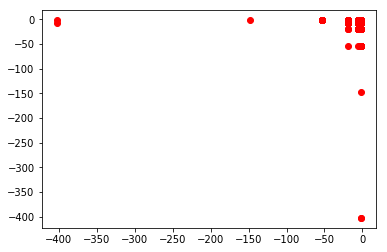

In [46]:
Y = np.roll(U,-1)[:-1]
X = U[:-1]
plt.plot(X,Y,"ro")

In [39]:
A = np.asarray([1.,1.2,4.,5.])